# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Discretisation strategies

<br></font>
</div>

# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import make_blobs

# Dataset

<div class="alert alert-block alert-info">
<font color=black><br>

- **UNIFORM**: The discretization is uniform in each feature, which means that the bin widths are constant in each dimension.
- **QUANTILE**: The discretization is done on the quantiled values, which means that each bin has approximately the same number of samples.
- **KMEANS** : The discretization is based on the centroids of a KMeans clustering procedure.

<br></font>
</div>

In [2]:
strategies = ['uniform', 'quantile', 'kmeans']

n_samples = 200
centers_0 = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1 = np.array([[0, 0], [3, 1]])

# construct the datasets
random_state = 42
X_list = [
    np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2)),
    make_blobs(n_samples=[n_samples // 10, n_samples * 4 // 10,
                          n_samples // 10, n_samples * 4 // 10],
               cluster_std=0.5, centers=centers_0,
               random_state=random_state)[0],
    make_blobs(n_samples=[n_samples // 5, n_samples * 4 // 5],
               cluster_std=0.5, centers=centers_1,
               random_state=random_state)[0],
]

# Plotting

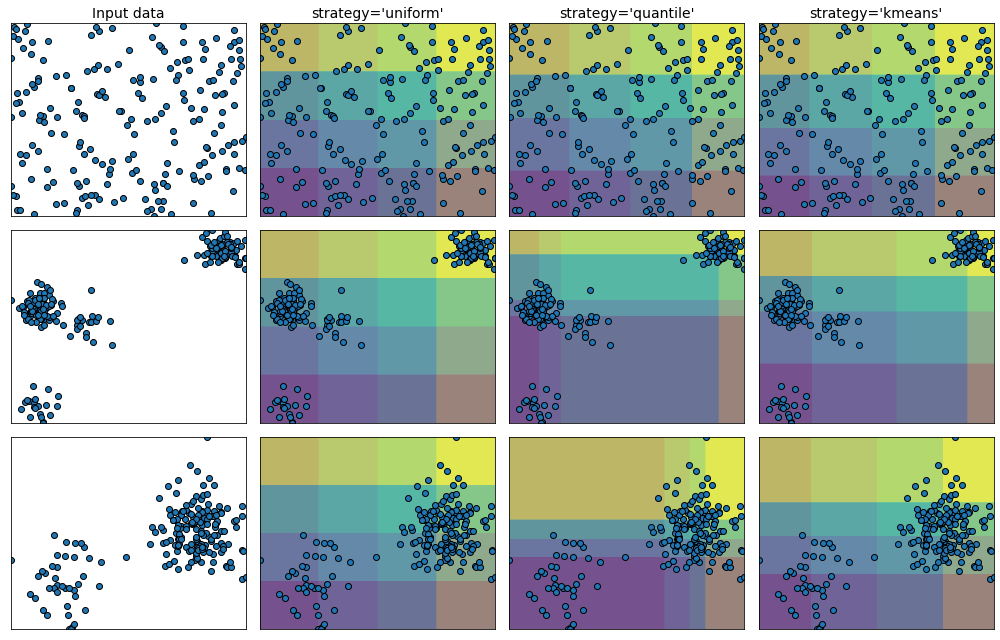

In [3]:
figure = plt.figure(figsize=(14, 9))
i = 1
for ds_cnt, X in enumerate(X_list):

    ax = plt.subplot(len(X_list), len(strategies) + 1, i)
    ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy=strategy)
        enc.fit(X)
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(X_list), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=.5)
        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=.5)

        ax.scatter(X[:, 0], X[:, 1], edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy, ), size=14)

        i += 1

plt.tight_layout()
plt.show()

# Reference

<div class="alert alert-warning">
<font color=black>

- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html#sphx-glr-auto-examples-preprocessing-plot-discretization-strategies-py

</font>
</div>